In [2]:
from lsa import *
import matplotlib.pyplot as plt

In [3]:
data_dir = 'data'

In [4]:
data_files = [os.path.join(data_dir, f) for f in DATA_FILES]

In [5]:
df_data = load_data(data_files)

In [6]:
df_data

,title,author,url,content,id,publication
0,It’s Possible to Hack a Phone With Sound Waves...,John Markoff,NaN,SAN FRANCISCO — A security loophole that wo...,19284,New York Times
1,Politically Correct School Officials Reject ’G...,Tom Ciccotta,NaN,A report from The Baltimore Sun claims that Ba...,44077,Breitbart
2,"Clinton, Sanders use N.H. primary to frame lon...",Philip Rucker,https://web.archive.org/web/20160206013008/htt...,"CONCORD, N. H. — For the Democratic presi...",209714,Washington Post
3,The ambitious Democrat who can make Trump Univ...,Charles Gasparino,http://nypost.com/2016/03/08/the-ambitious-dem...,Add one more bizarre twist to the 2016 preside...,135930,New York Post
4,People Are Slamming Tribeca Film Festival For...,Susan Cheng,https://web.archive.org/web/20160325115729/htt...,Organizers for the upcoming 2016 Tribeca Film...,106460,Buzzfeed News
...,...,...,...,...,...,...
995,Autopsy shows Keith Lamont Scott had four guns...,Wesley Lowery,https://web.archive.org/web/20161013005231/htt...,Keith Lamont Scott was struck at least th...,215980,Washington Post
996,Trump Names Prominent Climate Denier To His E...,Dan Vergano,https://web.archive.org/web/20161211105648/htt...,Donald Trump’s presidential transition team o...,113746,Buzzfeed News
997,"As Abenomics struggles, Japan PM pushes ’equal...",Tetsushi Kajimoto,http://www.reuters.com/article/us-japan-econom...,When Fumiko Kasai returned to work a decade a...,189393,Reuters
998,Tonys 2016: all of the winners at the 70th ann...,Constance Grady,http://www.vox.com/2016/6/12/11915988/tony-awa...,"The 70th annual Tony Awards, honoring the bes...",200799,Vox


In [7]:
df_words = preprocess_docs(df_data, use_lemmatizer=False, remove_numbers=False)
df_frequency = get_term_by_document_frequency(df_words)
df_reduced = reduce_terms(df_frequency, max_df=1, min_df=1, max_terms=0,
                          keep_less_freq=False)
df_tf_idf = get_tf_idf(df_reduced)

In [8]:
df_tf_idf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
monitor,0.031158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engin,0.007847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel,0.005550,NaN,0.003499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003877,NaN,NaN,NaN,NaN,NaN
execut,0.009363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.004397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pari,0.008829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005109,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
schweizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shameless,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
levenson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ernst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
values = df_tf_idf.fillna(0).to_numpy()

In [10]:
values

array([[0.03115776, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00784677, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00555018, 0.        , 0.00349941, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
U, s_eigen, V = np.linalg.svd(values, full_matrices=False)

In [12]:
s_eigen

array([3.20515317e+00, 1.49983402e+00, 1.38945882e+00, 1.04753992e+00,
       9.24949835e-01, 8.11414323e-01, 7.52390600e-01, 7.17475753e-01,
       7.03109632e-01, 6.99342578e-01, 6.76973479e-01, 6.63348566e-01,
       6.60494164e-01, 6.47899404e-01, 6.37384140e-01, 6.32710979e-01,
       6.20696272e-01, 6.17619107e-01, 6.06613955e-01, 6.00028716e-01,
       5.89318468e-01, 5.88818467e-01, 5.86247311e-01, 5.84101484e-01,
       5.80574086e-01, 5.77643277e-01, 5.74392879e-01, 5.71501930e-01,
       5.68808871e-01, 5.66506002e-01, 5.61020258e-01, 5.56235080e-01,
       5.55482086e-01, 5.51086886e-01, 5.48056034e-01, 5.44227964e-01,
       5.42985058e-01, 5.39642904e-01, 5.37869433e-01, 5.33918378e-01,
       5.30844138e-01, 5.29173442e-01, 5.26903721e-01, 5.21993060e-01,
       5.17514007e-01, 5.14656405e-01, 5.13456891e-01, 5.09518682e-01,
       5.07324696e-01, 5.06184888e-01, 5.03241514e-01, 5.00847429e-01,
       5.00615319e-01, 4.98494663e-01, 4.98113433e-01, 4.96466915e-01,
      

In [13]:
s_eigen[0]

3.205153173584319

In [14]:
s_eigen_norm = [x / s_eigen[0] for x in s_eigen]

In [15]:
s_eigen_norm

[1.0,
 0.4679445687563467,
 0.43350777558527587,
 0.3268299103259837,
 0.2885821004554425,
 0.2531592966913491,
 0.23474403854162057,
 0.22385069121535528,
 0.21936849641918776,
 0.21819318447978436,
 0.2112140799117266,
 0.20696314035250934,
 0.2060725736864282,
 0.20214303944761478,
 0.19886230256724427,
 0.19740428770957072,
 0.19365572834542902,
 0.1926956602043782,
 0.18926207957110341,
 0.18720750108030693,
 0.18386592966255974,
 0.18370993072387315,
 0.18290773617305311,
 0.18223824329147245,
 0.18113770379911232,
 0.18022329848879565,
 0.1792091822617944,
 0.17830721298699323,
 0.1774669853849858,
 0.17674849560026068,
 0.17503695688223497,
 0.17354399302925763,
 0.1733090606321025,
 0.17193776901172744,
 0.1709921504934158,
 0.16979780205062045,
 0.16941001840523928,
 0.16836727453373718,
 0.167813955893496,
 0.1665812363489383,
 0.16562208080196475,
 0.1651008277428576,
 0.16439268034954926,
 0.16286056613542274,
 0.16146311237747804,
 0.16057154741738203,
 0.1601973019611832

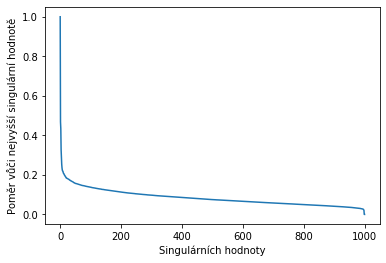

In [16]:
fig = plt.figure()
plt.plot(s_eigen_norm)
plt.xlabel('Singulárních hodnoty')
plt.ylabel('Poměr vůči nejvyšší singulární hodnotě')
fig.savefig('../report/singular_values.png')
plt.show()